In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')

In [2]:
x = torch.linspace(0,499,steps=500)
y = torch.sin(x*2*3.1416/30) + 0.05*torch.randn(500)

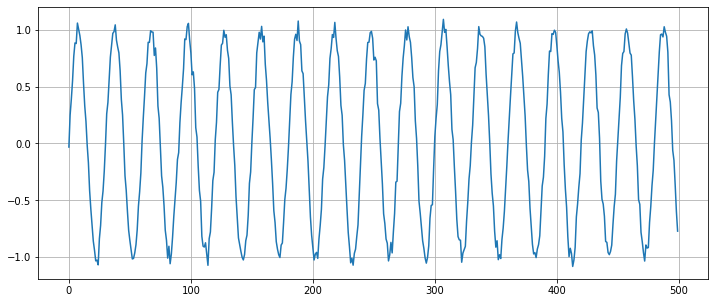

In [3]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(x,y)

In [4]:
test_size = 30
train_original_data = y[:-test_size]
test_original_data = y[-test_size:]

In [5]:
def sequence_creator(input_data, window):
    dataset = []
    data_len = len(input_data)
    for i in range(data_len - window):
        window_fr = input_data[i:i+window]
        label = input_data[i+window:i+window+1]
        dataset.append((window_fr, label))
    return dataset

In [6]:
window_size = 30
train_data = sequence_creator(train_original_data, window_size)

In [7]:
class LSTM_Model(nn.Module):
    def __init__(self, in_size=1,h_size=50, out_size=1):
        super().__init__()
        
        self.h_size = h_size
        self.lstm = nn.LSTM(in_size, h_size)
        self.fc = nn.Linear(h_size, out_size)
        
        self.hidden = (torch.zeros(1, 1,h_size), torch.zeros(1, 1,h_size))
        
    def forward(self, sequence_data):
        lstm_out, self.hidden = self.lstm(sequence_data.view(len(sequence_data),1,1),self.hidden)
        pred = self.fc(lstm_out.view(len(sequence_data), -1))
        
        return pred[-1]
        

In [8]:
torch.manual_seed(3)
model = LSTM_Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
epochs = 10
test =30
loss_list = []

for epoch in range(epochs):
    for sequence_in, y_train in train_data:
        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.h_size),torch.zeros(1,1,model.h_size))
        
        loss.backward()
        optimizer.step()
        
    loss_list.append(loss)
    print(f'Epoch {epoch+1} Loss {loss.item():.3f}')

Epoch 1 Loss 0.269
Epoch 2 Loss 0.159
Epoch 3 Loss 0.101
Epoch 4 Loss 0.046
Epoch 5 Loss 0.010
Epoch 6 Loss 0.003
Epoch 7 Loss 0.002
Epoch 8 Loss 0.002
Epoch 9 Loss 0.002
Epoch 10 Loss 0.002


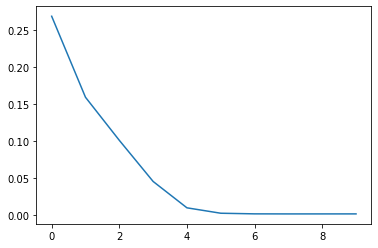

In [10]:
plt.plot(loss_list)

In [11]:
predict_list = []
predict_list = train_original_data[-window_size:].tolist()

model.eval()

LSTM_Model(
  (lstm): LSTM(1, 50)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Loss 0.006


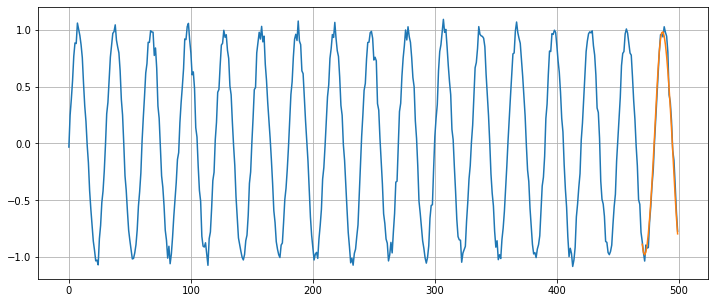

In [13]:
for i in range(test):
    sequence_in = torch.FloatTensor(predict_list[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.h_size), torch.zeros(1,1,model.h_size))
        predict_list.append(model(sequence_in).item())
        
loss = criterion(torch.tensor(predict_list[-window_size:]),y[470:])
print(f'Loss {loss.item():.3f}')
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(470,500),predict_list[-window_size:])
plt.show()

In [14]:
epochs = 5
window_size = 30
unknown  = 30

full_data = sequence_creator(y, window_size)
model.train()

LSTM_Model(
  (lstm): LSTM(1, 50)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
for epoch in range(epochs):
    for sequence_in, y_train in full_data:
        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1,model.h_size), torch.zeros(1,1,model.h_size))
        
        loss.backward()
        optimizer.step()
        
    print(f'Epoch { epoch+1} Loss {loss.item():.3f}')
    
    
    predict_list = y[-window_size:].tolist()
    model.eval()
    for i in range(unknown):
        sequence = torch.FloatTensor(predict_list[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.h_size),torch.zeros(1,1,model.h_size) )
            predict_list.append(model(sequence).item())
            
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(470,500),predict_list[-window_size:])
plt.show()            
    

Epoch 1 Loss 0.001
Epoch 2 Loss 0.001
Epoch 3 Loss 0.001
Epoch 4 Loss 0.001
